In [91]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from scipy import signal
import pandas as pd
import statsmodels.stats.diagnostic as sm
from obspy.signal.detrend import polynomial
import statsmodels

In [92]:
dados = sc.loadmat('series_chl_sst_v2.mat')
chl_P1 = dados['chl_P1'][0:828,:]
chl_P2 = dados['chl_P2']
chl_P3 = dados['chl_P3']
chl_P4 = dados['chl_P4']
sst_P1 = dados['sst_P1'][0:644,:]
sst_P2 = dados['sst_P2']
sst_P3 = dados['sst_P3']
sst_P4 = dados['sst_P4']
timeC = np.linspace(start=1,stop=18,num=828)
timeS = np.linspace(start=1,stop=18,num=644)
plt.style.use('ggplot')

(0.0, 600.0)

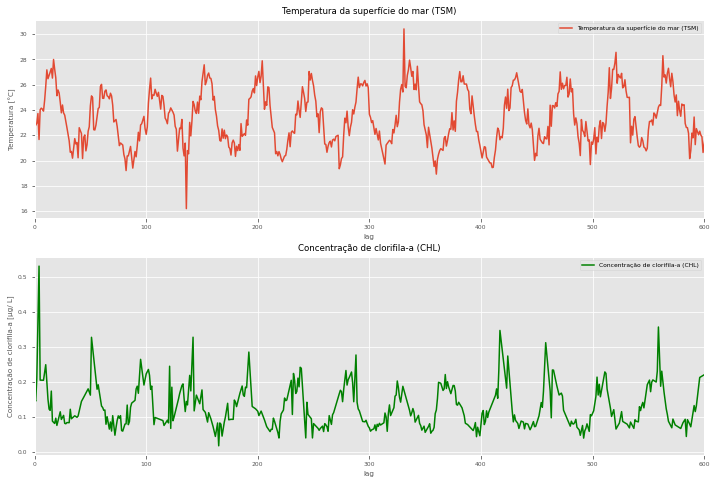

In [93]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})
plt.subplot(211)
plt.plot(sst_P1,label='Temperatura da superfície do mar (TSM)')
plt.title('Temperatura da superfície do mar (TSM)')
plt.ylabel('Temperatura [°C]')
plt.xlabel('lag')
plt.xlim(0,600)
plt.legend()
plt.subplot(212)
plt.plot(chl_P1,label='Concentração de clorifila-a (CHL)',color='green')
plt.title('Concentração de clorifila-a (CHL)')
plt.ylabel('Concentração de clorifila-a [μg/ L]')
plt.xlabel('lag')
plt.legend()
plt.xlim(0,600)


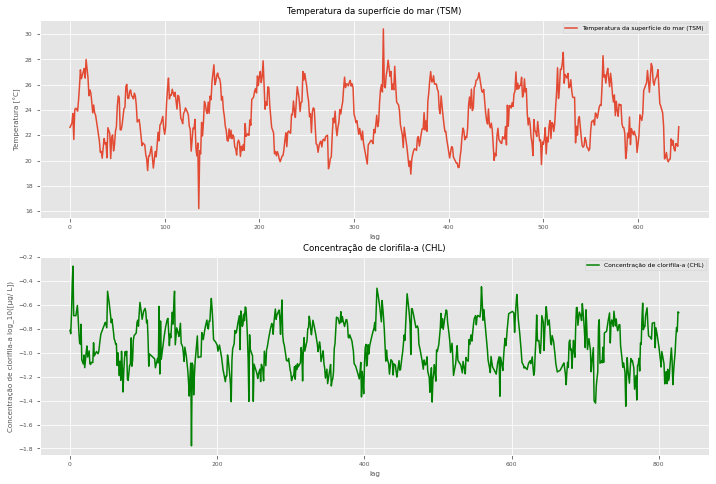

In [94]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(sst_P1,label='Temperatura da superfície do mar (TSM)')
plt.title('Temperatura da superfície do mar (TSM)')
plt.ylabel('Temperatura [°C]')
plt.xlabel('lag')
plt.legend()
plt.subplot(212)
plt.plot(np.log10(chl_P1),label='Concentração de clorifila-a (CHL)',color='green')
plt.title('Concentração de clorifila-a (CHL)')
plt.ylabel('Concentração de clorifila-a log_10([μg/ L])')
plt.xlabel('lag')
plt.legend()


In [95]:
detredssh=statsmodels.tsa.tsatools.detrend(sst_P1, order=3, axis=0)
detredchl=statsmodels.tsa.tsatools.detrend(np.log10(chl_P1), order=3, axis=0)

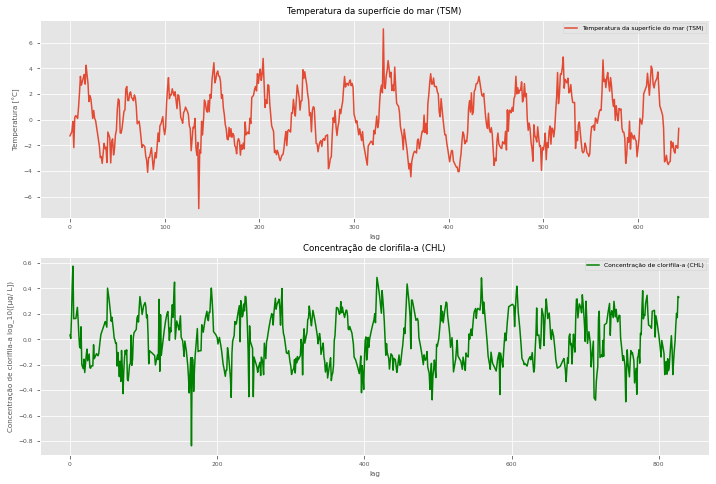

In [96]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(detredssh,label='Temperatura da superfície do mar (TSM)')
plt.title('Temperatura da superfície do mar (TSM)')
plt.ylabel('Temperatura [°C]')
plt.xlabel('lag')
plt.legend()
plt.subplot(212)
plt.plot(detredchl,label='Concentração de clorifila-a (CHL)',color='green')
plt.title('Concentração de clorifila-a (CHL)')
plt.ylabel('Concentração de clorifila-a log_10([μg/ L])')
plt.xlabel('lag')
plt.legend()
plt.legend()

In [97]:
def calculate_fourier_coeff(y):
    y = np.array(y)
    N = len(y)
    A = np.zeros(N//2)
    B = np.zeros(N//2)
    T = np.zeros(N//2)
    f = np.zeros(N//2)
    
    for p in range(1, N//2 + 1):
        Alpha = 0
        Beta = 0
        for n in range(N):
            Alpha += (2/N) * (y[n] * np.cos((2 * np.pi * n * p) / N))
            Beta += (2/N) * (y[n] * np.sin((2 * np.pi * n * p) / N))
        A[p-1] = Alpha
        B[p-1] = Beta
        T[p-1] = N / p
        f[p-1] = p / N
    
    Ao = 2 * np.mean(y)
    A = np.insert(A, 0, Ao)
    B = np.insert(B, 0, 0)
    f = np.insert(f, 0, np.nan)
    T = np.insert(T, 0, np.nan)
    C = np.sqrt(A**2 + B**2)
    theta = np.arctan2(B, A)
    theta = np.degrees(theta)
    theta[0] = np.nan
    
    return A, B, C, theta, f, T

def calculate_fourier_series2(A, B, f, N):
    """
    Function that uses the Fourier coefficients to estimate 
    the original Fourier time series
    Usage: 
           y, Y = calculate_fourier_series(A, B, N)

           A: coefficients of cosine function
           B: coefficients of sine function
           N: number of points to estimate A and B

           y: series of cosine and sines
           Y: value of series
    """
    import numpy as np

    A = np.array(A)
    B = np.array(B)
    A = A.reshape(-1, 1)
    B = B.reshape(-1, 1)
    Ao = A[0]
    A = A[1:]
    B = B[1:]
    Na = len(A)
    Nb = len(B)
    if Na != Nb:
        raise ValueError('A and B must be the same size')
    y = np.zeros((Na, N))
    i = np.arange(1, N+1)
    for p in range(Na):
        y[p, :] = y[p, :] + A[p] * np.cos(2 * np.pi * p * i / N) + B[p] * np.sin(2 * np.pi * p * i / N)
    Y = 0.5 * Ao + np.sum(y, axis=0)
    return y, Y

In [98]:
At, Bt, Ct, thetat, ft, Tt = calculate_fourier_coeff(sst_P1)
Ac, Bc, Cc, thetac, fc, Tc = calculate_fourier_coeff(chl_P1)

In [99]:
Atx = np.argsort(At)[::-1][:6]
Atx

array([ 0,  4, 10, 67,  6,  1])

In [100]:
At[Atx]

array([46.78200206,  0.23004915,  0.20168221,  0.15827286,  0.15221472,
        0.15094963])

In [111]:
ft[Atx]

array([       nan, 0.00621118, 0.01552795, 0.10403727, 0.00931677,
       0.0015528 ])

In [112]:
Tt[Atx]

array([         nan, 161.        ,  64.4       ,   9.6119403 ,
       107.33333333, 644.        ])

In [101]:
Btx = np.argsort(Bt)[::-1][:6]
Btx

array([14,  6, 20, 17, 22, 55])

In [102]:
Bt[Btx]

array([2.22623559, 0.21330429, 0.1962461 , 0.1616022 , 0.16145243,
       0.14340388])

In [103]:
Acx = np.argsort(Ac)[::-1][:6]
Acx

array([ 0, 18, 25,  6, 34, 12])

In [104]:
Ac[Acx]

array([0.25626171, 0.05891033, 0.00597877, 0.00562355, 0.00560137,
       0.00515924])

In [105]:
Bcx = np.argsort(Bc)[::-1][:6]
Bcx

array([18, 36, 30, 46,  2, 49])

In [106]:
Bc[Bcx]

array([0.03443252, 0.01480117, 0.00588837, 0.00580585, 0.0053072 ,
       0.0050731 ])

In [113]:
fc[Bcx] 

array([0.02173913, 0.04347826, 0.03623188, 0.05555556, 0.00241546,
       0.05917874])

In [114]:
Tc[Bcx]

array([ 46.        ,  23.        ,  27.6       ,  18.        ,
       414.        ,  16.89795918])

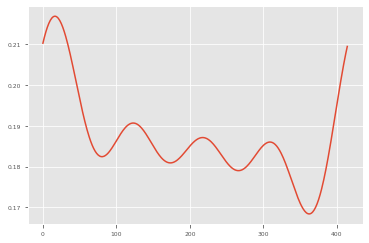

In [107]:
y,Y = calculate_fourier_series2(Ac[Acx],Bc[Bcx],ft[Bcx],N=len(Ac))
plt.plot(Y)

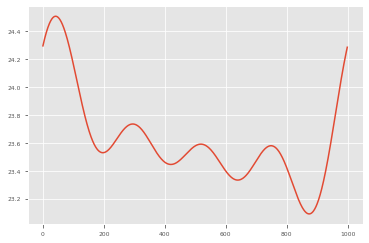

In [108]:
y,Y = calculate_fourier_series2(At[Atx],Bt[Btx],ft[Btx],N=1000)
plt.plot(Y)

/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


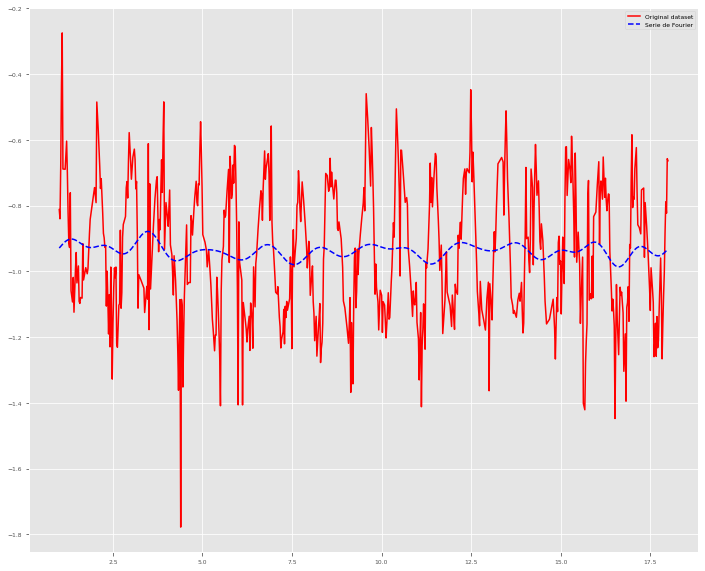

In [119]:
y = np.log10(chl_P1[:,0])
x = timeC
n = len(y)
plt.figure(figsize=(12,10))

for i in range(Acx[0]):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a Clorifila')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")

plt.legend()


/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 864x576 with 0 Axes>

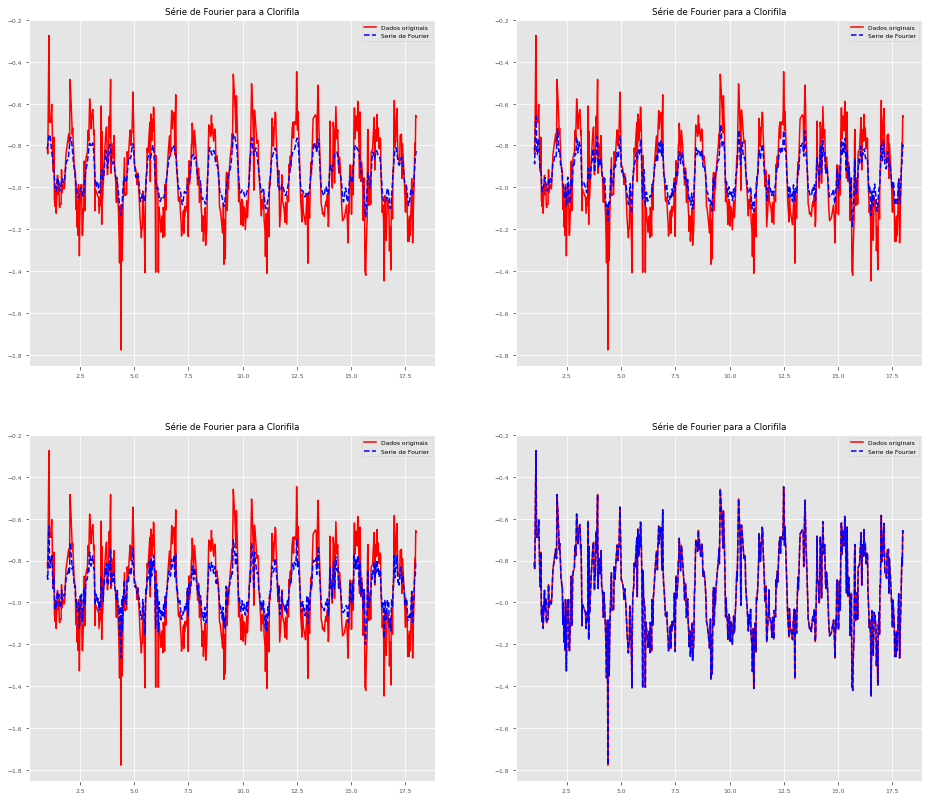

In [124]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(16,14))

plt.subplot(221)
y = np.log10(chl_P1[:,0])
x = timeC
n = len(y)

for i in range(100):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a Clorifila')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")


plt.legend()
plt.subplot(222)


for i in range(200):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a Clorifila')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")

plt.legend()
plt.subplot(223)


for i in range(300):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a Clorifila')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")
plt.legend()
plt.subplot(224)


for i in range(n):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a Clorifila')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")

plt.legend()


/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/lucas/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 864x576 with 0 Axes>

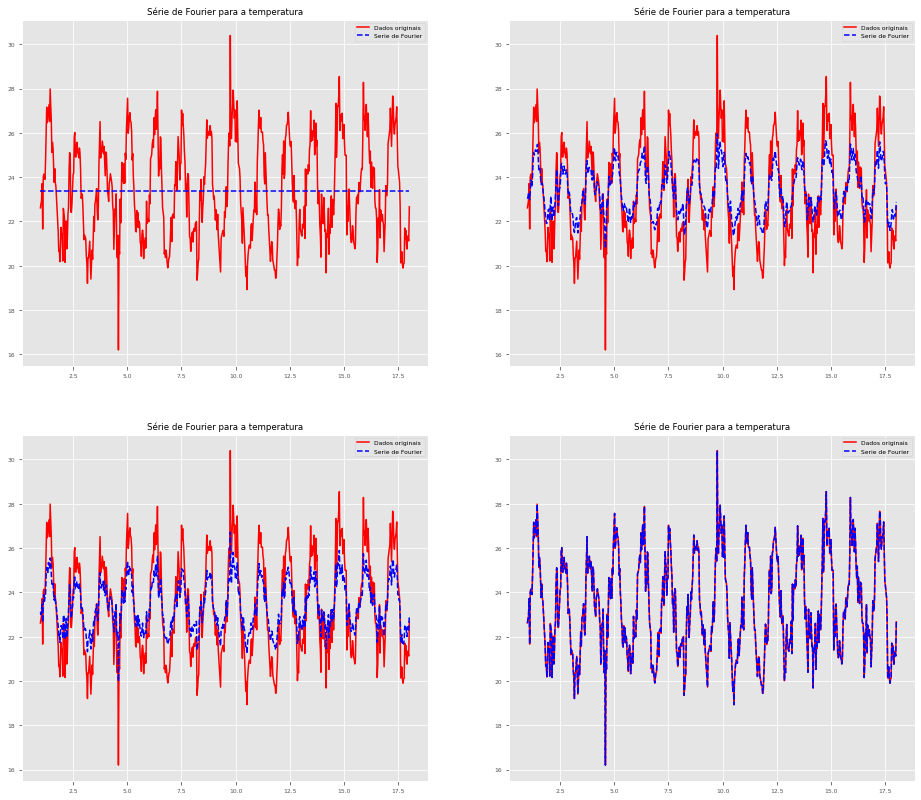

In [128]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(16,14))

plt.subplot(221)
y = sst_P1[:,0]
x = timeS
n = len(y)

for i in range(100):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a temperatura')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")


plt.legend()
plt.subplot(222)


for i in range(200):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a temperatura')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")

plt.legend()
plt.subplot(223)


for i in range(300):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a temperatura')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")
plt.legend()
plt.subplot(224)


for i in range(n):
        Y = np.fft.fft(y)
        np.put(Y, range(i+1, n), 0.0)
        ifft = np.fft.ifft(Y)
plt.title('Série de Fourier para a temperatura')
plt.plot(x,y,'r', label="Dados originais")
plt.plot(x,ifft,'b--', label="Serie de Fourier")

plt.legend()
